# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [58]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [59]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


 **Cleaning process**

In [60]:
## Check for missing values
print("Missing values before removal:")
print(spaceship.isnull().sum())

# Remove rows with missing values
df = spaceship.dropna()

# Check for missing values after removal
print("\nMissing values after row removal:")
print(df.isnull().sum())

# Transform Cabin to extract the first letter of the cabin {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}
df['Cabin'] = df['Cabin'].str[0]  # Extract the first letter

# Delate columns PassengerId y Name
df = df.drop(['PassengerId', 'Name'], axis=1)

# Create dummies
df = pd.get_dummies(df, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination'], drop_first=True)

#Split data into features and target
features = df.drop(columns = ["Transported"])
target = df["Transported"]

Missing values before removal:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Missing values after row removal:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


C:\Users\celia\AppData\Local\Temp\ipykernel_16628\1199655552.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin'] = df['Cabin'].str[0]  # Extract the first letter


Now perform the same as before:
- Feature Scaling
- Feature Selection


**Perform Train Test Split**

In [61]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [62]:
#Normalizer
normalizer = MinMaxScaler()

normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [63]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.405063,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.050633,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.379747,0.0,0.00000,0.007916,0.000000,0.051276,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.215190,0.0,0.00131,0.000000,0.046111,0.016378,0.000049,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.329114,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [64]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.632911,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.227848,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.189873,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.658228,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.784810,1.0,0.0,0.054775,0.0,0.07774,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [65]:
#Use KNN predective model as Classifier- Best model for this case
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=35)

- Evaluate your model

In [66]:
#Evaluate
knn.score(X_test_norm, y_test)

0.7776096822995462

**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [67]:
#Define the grid
grid = {'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

- Run Grid Search

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [69]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator = knn, param_grid = grid, cv=5)

In [70]:
model.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [71]:
model.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [72]:
best_model = model.best_estimator_

In [73]:
print("Mejores parámetros:", model.best_params_)
print("Mejor precisión:", model.best_score_)

Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Mejor precisión: 0.7651373598807374


- Evaluate your model

Accuracy del modelo: 0.762481089258699
F1-Score del modelo: 0.762481089258699
Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.76      0.76      0.76       661
        True       0.76      0.76      0.76       661

    accuracy                           0.76      1322
   macro avg       0.76      0.76      0.76      1322
weighted avg       0.76      0.76      0.76      1322

Scores de validación cruzada: [0.77294229 0.7615894  0.77388836 0.76631977 0.75094697]
Promedio del score de validación cruzada: 0.7651373598807374


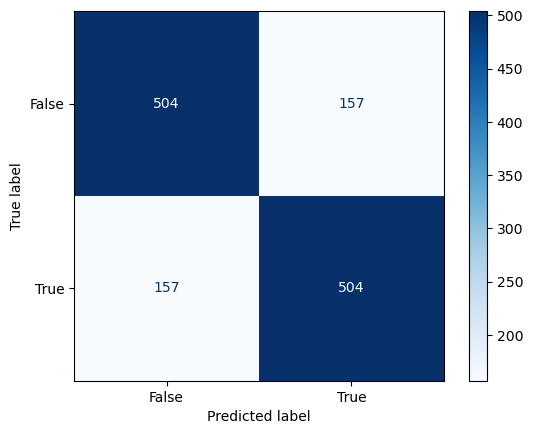

In [ ]:
#Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Predictions
y_pred = best_model.predict(X_test_norm)

# Evalaution metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'macro', 'micro', o 'weighted'

print("Accuracy del modelo:", accuracy)
print("F1-Score del modelo:", f1)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap='Blues')

# Cross-validation
cv_scores = cross_val_score(best_model, X_train_norm, y_train, cv=5, scoring='accuracy')
print("Scores de validación cruzada:", cv_scores)
print("Promedio del score de validación cruzada:", cv_scores.mean())
